*`Author: Chirodip Lodh Choudhury
email-chirodiplodh@gmail.com`*

**LOADING DATASET FROM DRIVE**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#**UNZIPPING THE IMAGE DATASET**

In [0]:
!unzip '/content/drive/My Drive/brain-mri-images-for-brain-tumor-detection.zip'

# *Importing Necessary Libraries*

In [0]:
from os import *
import os
import cv2
import keras
from pathlib import Path
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline




p='/content/yes'
p1='/content/no'

In [0]:
X = []
Y = []

# *Loading of Image Datasets*
here alongside, we are attaching a label ie. 1 or 0 with the images as this is a Supervised Approach

In [52]:
for name in tqdm(os.listdir(p)):
  path = os.path.join(p, name) 
  _im_data=(cv2.imread(path,cv2.IMREAD_GRAYSCALE))
  X.append(cv2.resize(_im_data,(310,366)))
  Y.append([1])
for name in tqdm(os.listdir(p1)):
  path = os.path.join(p1, name)
  _im_data1=(cv2.imread(path,cv2.IMREAD_GRAYSCALE))
  X.append(cv2.resize(_im_data1,(310,366)))
  Y.append([0])


100%|██████████| 98/98 [00:00<00:00, 568.26it/s]


In [53]:
X = np.array(X)
Y = np.array(Y)
X = X.reshape((253,366,310, 1))
# X = X.reshape((366, 310, 1, 253))
#Y = Y.reshape((2, 125))
X[0].shape, X.shape, Y.shape

((366, 310, 1), (253, 366, 310, 1), (253, 1))

In [54]:
from keras.utils import to_categorical
Y=to_categorical(Y)
type(Y)

numpy.ndarray

In [55]:
Y.shape

(253, 2)

# Preparing Training and Testing Data for Training of our Model

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y)

In [60]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((189, 366, 310, 1), (189, 2), (64, 366, 310, 1), (64, 2))

In [0]:
x_test=np.array(x_test)

# **Building The Model**

### Here , we built a CNN model from scratch...

In [0]:
from keras.models import Sequential
from keras.layers import *

model=Sequential()
model.add(Conv2D(100,(2,2),input_shape=(366,310,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

model.add(Conv2D(64,(2,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Conv2D(32,(2,2)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(3,3)))


model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 365, 309, 100)     500       
_________________________________________________________________
activation_11 (Activation)   (None, 365, 309, 100)     0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 121, 103, 100)     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 120, 102, 64)      25664     
_________________________________________________________________
activation_12 (Activation)   (None, 120, 102, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 34, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 39, 33, 32)       

# The Model is Learning!!

In [0]:
model.fit(x_train,y_train,epochs=35)

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = x_test[21]
test_image = test_image[:, :, 0]
test_image.shape

(366, 310)

(366, 310)


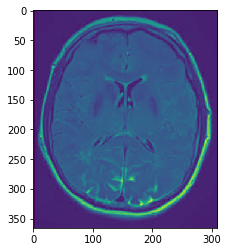

In [67]:
print(test_image.shape)
imgplot = plt.imshow(test_image)

test_image = np.array([test_image]).reshape((366, 310, 1))

# *Time for Prediction!!!*

In [69]:
prediction = model.predict(np.array([test_image]))
#print(prediction)
prediction_outcome = np.argmax(prediction) # np.argmax will select the 
                                           # maximum valued index from the prediction

# the output "prediction_outcome" will be in integers... as of yes or no...

if (prediction_outcome==1):
  print("MALLINGANT")
else:
  print("NON MALLINGANT")


MALLINGANT
